In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [35]:
df = pd.read_csv('titanic.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


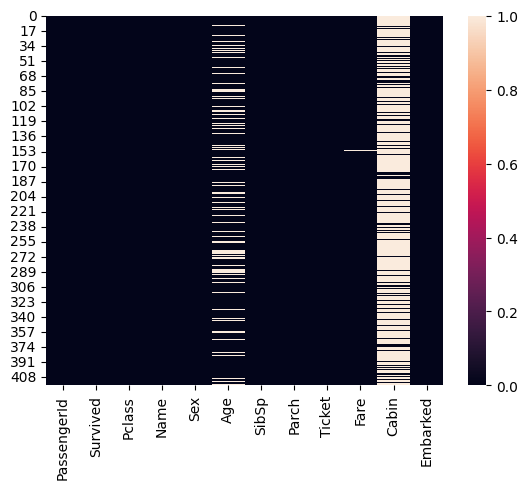

In [36]:
sns.heatmap(df.isnull())
df.drop(['Cabin'], axis = 1, inplace = True)

In [37]:
df.head()
mean_value = int(df['Age'].mean())

In [38]:
df['Age'].fillna(mean_value, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


<Axes: xlabel='Survived', ylabel='count'>

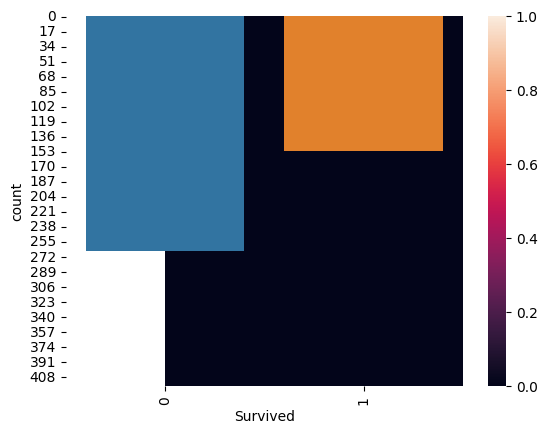

In [39]:
sns.heatmap(df.isnull())
sns.countplot(x = 'Survived', data = df)

In [40]:
male = pd.get_dummies(df['Sex'], drop_first = True)
embark = pd.get_dummies(df['Embarked'], drop_first = True)

In [41]:
df1 = pd.concat([df, embark, male], axis = 1)
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Q,S,male
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,True,False,True
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,False,True,False
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,True,False,True
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,False,True,True
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,False,True,False


In [42]:
df2 = df1.drop(['PassengerId', 'Sex', 'Name', 'Ticket', 'Embarked'], axis = 
1)
df2.dropna(inplace=True)
df2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,0,3,34.5,0,0,7.8292,True,False,True
1,1,3,47.0,1,0,7.0000,False,True,False
2,0,2,62.0,0,0,9.6875,True,False,True
3,0,3,27.0,0,0,8.6625,False,True,True
4,1,3,22.0,1,1,12.2875,False,True,False


In [43]:
y = df2['Survived']
X = df2.drop(['Survived'], axis = 1)


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=250)

In [46]:
model.fit(X_train, y_train)
prediction = model.predict(X_test)
model.score(X_test,prediction)

1.0

In [47]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [48]:
confusion_matrix(y_test, prediction)


array([[78,  0],
       [ 0, 48]], dtype=int64)

In [49]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        48

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

